<a href="https://colab.research.google.com/github/bhagatpandey369/Book_Code/blob/main/THE_HUNDRED_PAGE_LANGUAGE_MODELS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Chapter 1. Machine Learning Basics

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
n_inputs = 0
n_outputs = 0

In [ ]:
model = nn.Sequential(
    nn.Linear(n_inputs, n_outputs),
    nn.Sigmoid()
    )

/usr/local/lib/python3.12/dist-packages/torch/nn/init.py:582: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [ ]:
model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Sigmoid()
)

In [ ]:
inputs = torch.tensor([[22, 25], [25, 35], [47, 80], [52, 95], [46, 82], [56, 90], [23, 27], [30, 50], [40, 60], [39, 57], [53, 95], [48, 88]], dtype=torch.float32)

In [ ]:
inputs

tensor([[22., 25.],
        [25., 35.],
        [47., 80.],
        [52., 95.],
        [46., 82.],
        [56., 90.],
        [23., 27.],
        [30., 50.],
        [40., 60.],
        [39., 57.],
        [53., 95.],
        [48., 88.]])

In [ ]:
 labels = torch.tensor([[0], [0], [1], [1], [1], [1], [0], [1], [1], [0], [1], [1 ]], dtype=torch.float32)

In [ ]:
labels

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.]])

In [ ]:
inputs.shape[1]

2

In [ ]:
n_inputs = inputs.shape[1]
n_outputs = 1

In [ ]:
model = nn.Sequential(
    nn.Linear(n_inputs, n_outputs),
    nn.Sigmoid()
    )

In [ ]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.BCELoss() # binary cross entropy loss

In [ ]:
inputs.shape

torch.Size([12, 2])

In [ ]:
for step in range(500):
  optimizer.zero_grad()
  loss = criterion(model(inputs), labels)
  loss.backward()
  optimizer.step()

In [ ]:
loss

tensor(0.8130, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [ ]:
model = nn.Sequential(
    nn.Linear(inputs.shape[1], 100),
    nn.Sigmoid(),
    nn.Linear(100, labels.shape[1]),
    nn.Sigmoid()
    )

In [ ]:
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=1, bias=True)
  (3): Sigmoid()
)

###Chapter 2. Language Modeling Basics

ID  Text
 1. Movies are fun for everyone.
 2.  Watching movies is great fun.
 3. Enjoy a great movie today.
 4. Research is interesting and important.
 5. Learning math is very important.
 6. Science discovery is interesting.
 7. Rock is great to listen to.
 8. Listen to music for fun.
 9. Music is fun for everyone.
 10. Listen to folk music!

In [133]:
vocabulary = ["a", "and", "are", "discovery", "enjoy", "everyone", "folk", "for",
              "fun", "great", "important", "interesting", "is", "learning", "listen",
              "math", "movie", "movies", "music", "research", "rock", "science", "to",
              "today", "very", "watching"]

In [134]:
vocabulary

['a',
 'and',
 'are',
 'discovery',
 'enjoy',
 'everyone',
 'folk',
 'for',
 'fun',
 'great',
 'important',
 'interesting',
 'is',
 'learning',
 'listen',
 'math',
 'movie',
 'movies',
 'music',
 'research',
 'rock',
 'science',
 'to',
 'today',
 'very',
 'watching']

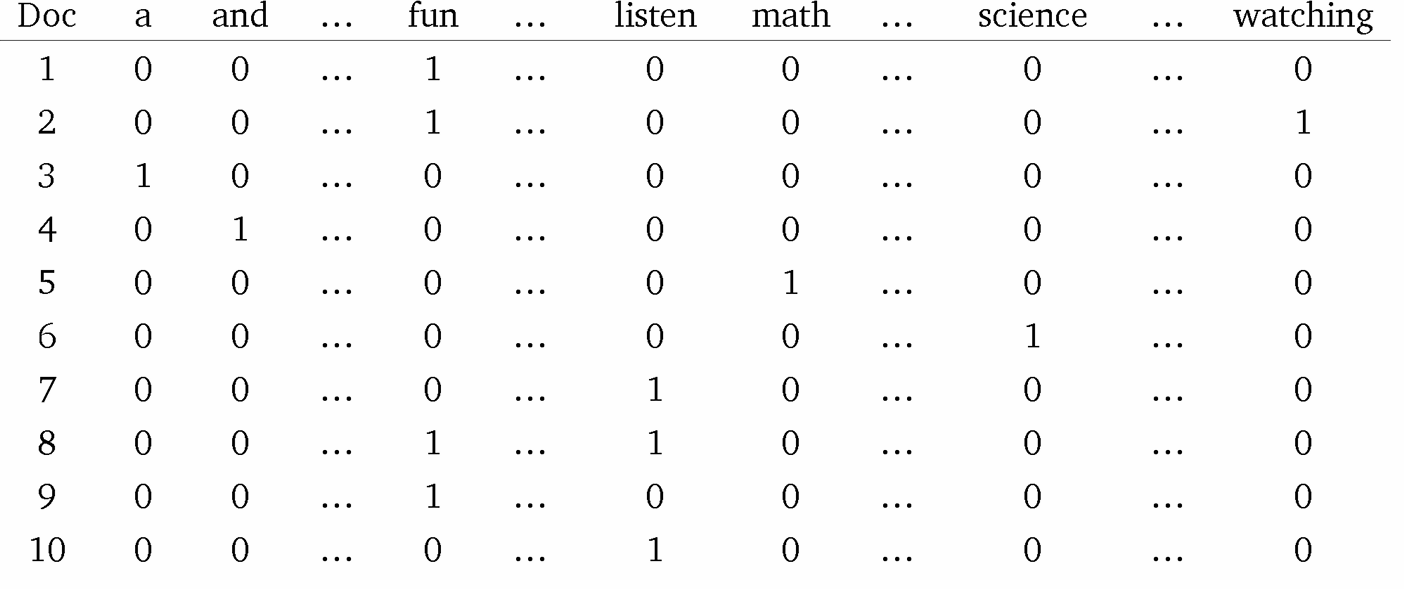

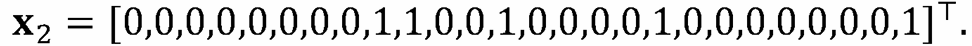

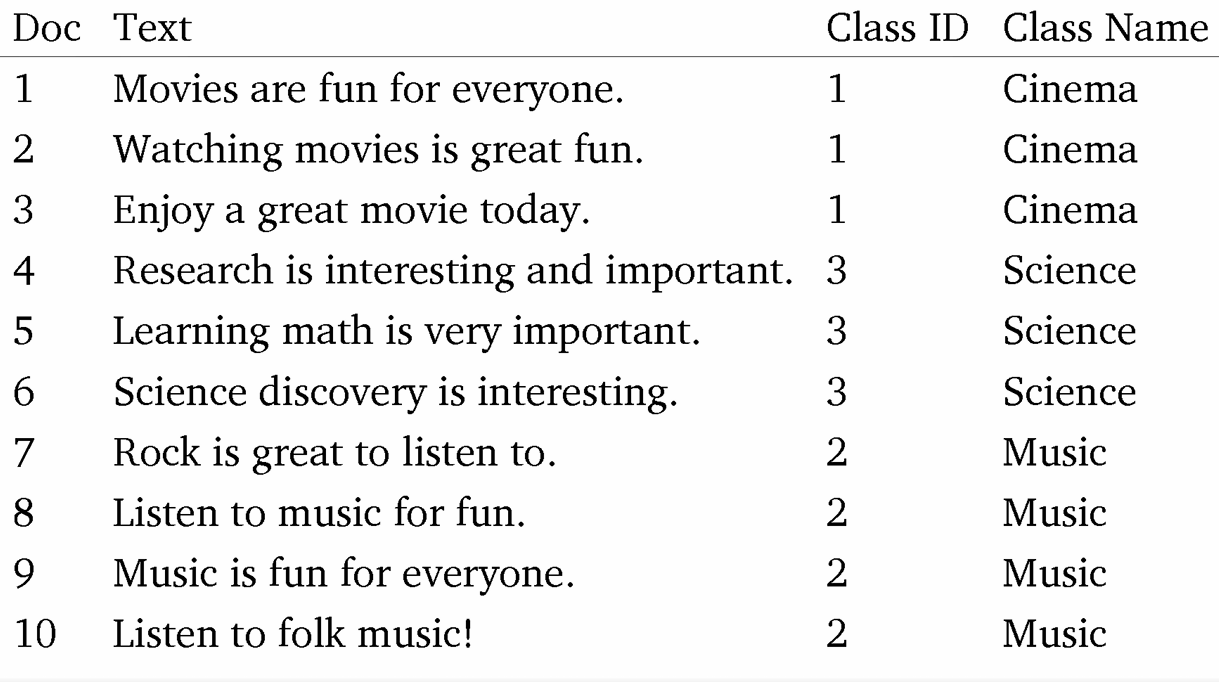

In [135]:
import re
import torch
import torch.nn as nn
torch.manual_seed(42)
doc = [
    "Movies are fun for everyone.",
    "Watching movies is great fun.",
    "Enjoy a great movie today.",
    "Research is interesting and important.",
    "Learning math is very important.",
    "Science discovery is interesting.",
    "Rock is great to listen to.",
    "Listen to music for fun.",
    "Music is fun for everyone.",
    "Listen to folk music!"
]
labels = [1, 1, 1, 3, 3, 3, 2, 2, 2, 2]
num_classes = len(set(labels))
num_classes


3

In [136]:
def tokenize(text):
  return re.findall(r'\w+', text.lower())

In [137]:
tokenize('hello my name is Bhagat Pandey!!, and i am 30 year old')

['hello',
 'my',
 'name',
 'is',
 'bhagat',
 'pandey',
 'and',
 'i',
 'am',
 '30',
 'year',
 'old']

In [138]:
def get_vocabulary(texts):
  tokens = {token for text in texts for token in tokenize(text)}
  return {word: idx for idx, word in enumerate(sorted(tokens))}

In [139]:
vocabulary = get_vocabulary(doc)
vocabulary

{'a': 0,
 'and': 1,
 'are': 2,
 'discovery': 3,
 'enjoy': 4,
 'everyone': 5,
 'folk': 6,
 'for': 7,
 'fun': 8,
 'great': 9,
 'important': 10,
 'interesting': 11,
 'is': 12,
 'learning': 13,
 'listen': 14,
 'math': 15,
 'movie': 16,
 'movies': 17,
 'music': 18,
 'research': 19,
 'rock': 20,
 'science': 21,
 'to': 22,
 'today': 23,
 'very': 24,
 'watching': 25}

In [140]:
bow = [0] * len(vocabulary)
bow

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [141]:
bow[vocabulary['music']] = 5

In [142]:
bow

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]

In [143]:
def doc_to_bow(doc, vocabulary):
  tokens = set(tokenize(doc))
  bow = [0] * len(vocabulary)
  for token in tokens:
    if token in vocabulary:
      bow[vocabulary[token]] = 1
  return bow

In [144]:
vector = torch.tensor([doc_to_bow(i, vocabulary) for i in doc], dtype=torch.float32)
vector

tensor([[0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
         0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0.,

In [145]:
labels = torch.tensor(labels, dtype=torch.long) -1
labels

tensor([0, 0, 0, 2, 2, 2, 1, 1, 1, 1])

In [159]:
class SimpleClassifier(nn.Module):
  def __init__(self, input_dim, hidden_dim, ouput_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    return x

In [160]:
input_dim = len(vocabulary)
hidden_dim = 50
output_dim = num_classes

In [161]:
model = SimpleClassifier(input_dim, hidden_dim, output_dim)

In [162]:
model

SimpleClassifier(
  (fc1): Linear(in_features=26, out_features=50, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=50, out_features=3, bias=True)
)

page number 62